# Логистическая регрессия, гиперпараметры, веса

## Данные
Как обычно, сначала загрузим данные и посмотрим на них.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('news_lenta_cropped.csv')

In [4]:
df.head()

,title,topic
0,Грудь Бритни Спирс вновь выскочила из лифчика ...,Культура
1,Попытка вернуть укатившийся мяч у Кремлевской ...,Силовые структуры
2,Хабенский стал врагом Украины,Культура
3,В Туркмении запретили продажу алкоголя,Бывший СССР
4,В Великобритании нашли утерянный сценарий Стен...,Культура


In [5]:
len(df)

129930

## MultinomialNB

Посмотрим, как с классификацией справится наивный байес и CountVectorizer с дефолтными настройками.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [10]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(df.title)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(bow, df.topic)

In [12]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
from sklearn.metrics import classification_report

In [15]:
print(classification_report(y_test, nb.predict(X_test)))

                   precision    recall  f1-score   support

      Бывший СССР       0.91      0.97      0.94     12914
         Культура       0.96      0.94      0.95     13187
Силовые структуры       0.90      0.85      0.87      4667
         Ценности       0.93      0.77      0.84      1715

      avg / total       0.93      0.93      0.93     32483



## Веса классов

In [18]:
nb.coef_

array([[-12.77065892, -12.07751174, -12.77065892, ..., -12.07751174,
        -12.77065892, -12.77065892],
       [-11.39164162, -10.98617651, -12.77793598, ..., -12.77793598,
        -12.0847888 , -12.77793598],
       [-12.17186932, -12.17186932, -12.17186932, ..., -12.17186932,
        -12.17186932, -12.17186932],
       [-11.71862983, -11.71862983, -11.02548265, ..., -11.71862983,
        -11.71862983, -11.02548265]])

In [28]:
two_classes = df[(df.topic == 'Культура') | (df.topic == 'Бывший СССР')]

In [36]:
two_classes.head()

,title,topic
0,Грудь Бритни Спирс вновь выскочила из лифчика ...,Культура
2,Хабенский стал врагом Украины,Культура
3,В Туркмении запретили продажу алкоголя,Бывший СССР
4,В Великобритании нашли утерянный сценарий Стен...,Культура
5,Сотня горняков под Луганском оказалась заблоки...,Бывший СССР


In [37]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(two_classes.title)
X_train, X_test, y_train, y_test = train_test_split(bow, two_classes.topic)
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
nb.coef_

array([[-11.35065062, -11.12750707, -10.17199563, ..., -12.73694498,
        -12.73694498, -12.0437978 ]])

In [39]:
vectorizer.vocabulary_

{'неэстонцев': 38727,
 'акаевых': 3582,
 'знаниями': 23013,
 'проверяющие': 52175,
 'бездельников': 6564,
 'яковлевым': 75133,
 'глупых': 14761,
 'бу': 8820,
 'писателем': 45928,
 'полтавский': 48315,
 'одессой': 40715,
 'похищениями': 49817,
 'опубликованного': 41602,
 'перевыборы': 44841,
 'леско': 31186,
 'прохоренко': 53234,
 'добираться': 18441,
 'аналогичном': 4175,
 'звучание': 22722,
 'эсминцем': 74654,
 'траура': 66186,
 'обучения': 40278,
 'павлу': 43679,
 'критика': 29681,
 'крика': 29609,
 'внедренным': 11110,
 'въезды': 12621,
 'экспериментальный': 74087,
 'верующих': 10144,
 'учащимися': 68967,
 'горлина': 15273,
 'бланк': 7553,
 'десятком': 17483,
 'автогонщик': 3099,
 'ведьмы': 9811,
 'зиновьев': 22904,
 'коммуникативной': 28193,
 'мелиорация': 33751,
 'худым': 71436,
 'батумских': 6335,
 'зоненфилд': 23097,
 'эрнсту': 74607,
 'поссорившихся': 49383,
 'аwards': 2772,
 'высоким': 13314,
 'экспериментальным': 74088,
 'ахмадулину': 5579,
 'невыносимость': 37641,
 'исполнит

### Задание

Найдите самый значимый признак.

### Confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test, nb.predict(X_test))

array([[12745,   173],
       [  548, 12689]])

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

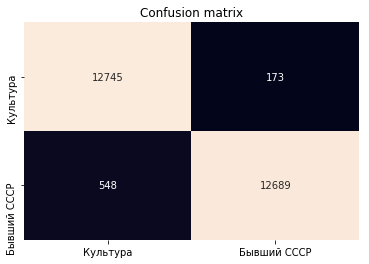

In [46]:
categories = ['Культура', 'Бывший СССР']
sns.heatmap(data=confusion_matrix(y_test, nb.predict(X_test)), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

### Задание:
Нарисуйте то же самое для 4 классов.

## Другое задание

Посмотрите [здесь](https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a), как построить графики для ROC и Precision-recall curve и постройте их.


### ROC

### Precision-recall curve